### Assignment 5

#### Part 1

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy import optimize


In [23]:
data = np.genfromtxt('/data9/UN3400/data/brf_temp.txt')
data


array([[ 0.0000000e+00, -1.7270000e+01],
       [ 4.1670000e-02, -1.7850000e+01],
       [ 8.3330000e-02, -1.8420000e+01],
       ...,
       [ 3.6516597e+02, -1.4530000e+01],
       [ 3.6520764e+02, -1.4680000e+01],
       [ 3.6525000e+02, -1.4760000e+01]])

#### Part 2

In [24]:
N, i = np.shape(data)

In [25]:
t = data[:,0:1]
t

array([[0.0000000e+00],
       [4.1670000e-02],
       [8.3330000e-02],
       ...,
       [3.6516597e+02],
       [3.6520764e+02],
       [3.6525000e+02]])

In [26]:
dobs = data[:,1:2]
dobs

array([[-17.27],
       [-17.85],
       [-18.42],
       ...,
       [-14.53],
       [-14.68],
       [-14.76]])

In [27]:
M = 3
G = np.zeros((N,M))
G[0:N,0:1] = np.ones((N,1))
G[0:N,1:2] = np.cos(((2 * np.pi)/365.25)* t)
G[0:N,2:3] = np.sin(((2 * np.pi)/365.25)* t)
G[0:N,3:4] = 1


In [28]:
GTG = np.matmul(G.T,G)
GTd = np.matmul(G.T,dobs)
mest = np.linalg.lstsq(GTG,GTd,rcond=None) [0]
mest


array([[  9.04146981],
       [-11.58329959],
       [ -4.27083943]])

In [29]:
dpre = np.matmul(G,mest)
e = dobs - dpre
sigmad2 = np.matmul(e.T,e)/(N-M)
Cd = sigmad2 * np.linalg.inv(GTG)
sm = np.sqrt(np.diag(Cd).reshape(-1,1))
sm


array([[0.05392669],
       [0.07569392],
       [0.07681815]])

In [30]:
print("estimated standard deviation of the data")
print(np.sqrt(sigmad2))


estimated standard deviation of the data
[[4.99470871]]


In [31]:
print("estimated solution of model parameters")
for k in range (M):
    print("model parameter %d: %.4f +/- %.4f" % (k, mest[k,0], 2.0*sm[k,0]))


estimated solution of model parameters
model parameter 0: 9.0415 +/- 0.1079
model parameter 1: -11.5833 +/- 0.1514
model parameter 2: -4.2708 +/- 0.1536


In [32]:
print("estimated solution of model parameters")
for k in range (M):
    print("model parameter %d: %.4f +/- %.4f" % (k, mest[k,0], 2.0*sm[k,0]))
    

estimated solution of model parameters
model parameter 0: 9.0415 +/- 0.1079
model parameter 1: -11.5833 +/- 0.1514
model parameter 2: -4.2708 +/- 0.1536


Text(0.5, 1.0, 'Daily Air Temperature at Black Rock Forest (Blue) vs. A Cubic Prediction (Black)')

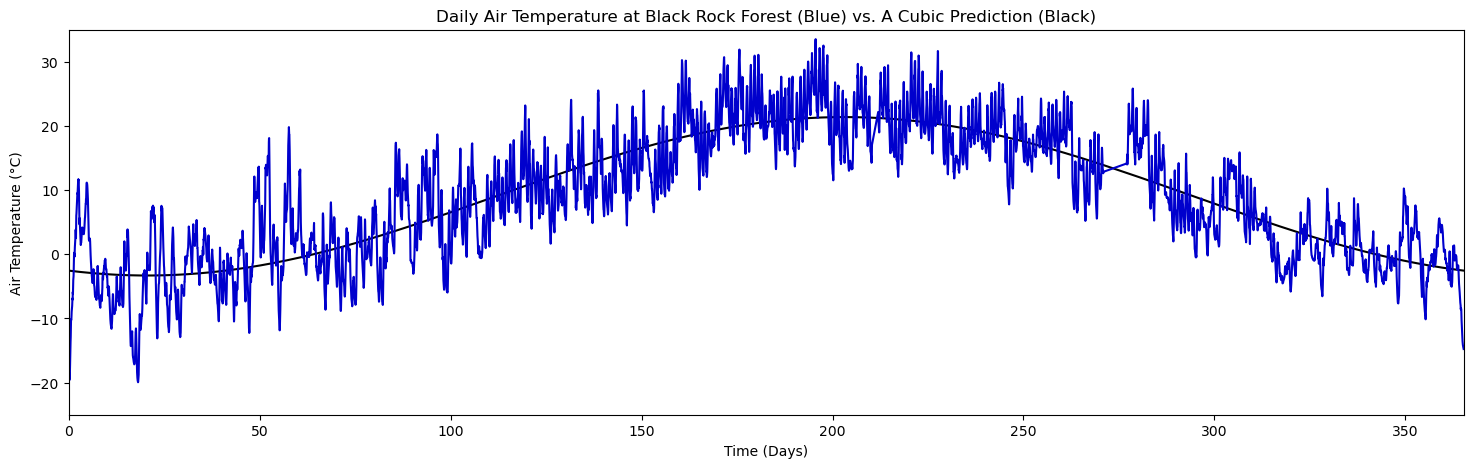

In [39]:
fig,ax = plt.subplots(figsize = (18,5))
plt.axis ([np.min(t), np.max(t), -25, 35])
plt.plot(t,dpre, 'k-')
plt.plot(t,dobs, 'mediumblue')
plt.xlabel('Time (Days)')
plt.ylabel('Air Temperature (°C)')
plt.title('Daily Air Temperature at Black Rock Forest (Blue) vs. A Cubic Prediction (Black)')


#### Part 3

In [34]:
P = (2 * np.pi)/365.25

def trigfunc(x, a, b, c):
    y = a * np.cos(P*x) + b*np.sin(P*x) + c
    return y

mest_ez = optimize.curve_fit(trigfunc, xdata = data[:,0], ydata = data[:,1])[0]
a = mest_ez[0]
b = mest_ez[1]
c = mest_ez[2]
dpre_trig = a* np.cos(P*t) + b*np.sin(P*t) + c


#### Part 4

In [35]:
D = np.sqrt(a**2 + b**2)
D


12.34556192685458

#### Part 5

In [36]:
tmax = max(t)
tmax


array([365.25])

#### Part 6

Text(0.5, 1.0, 'Prediction Error For The Daily Air Temperature at Black Rock Forest')

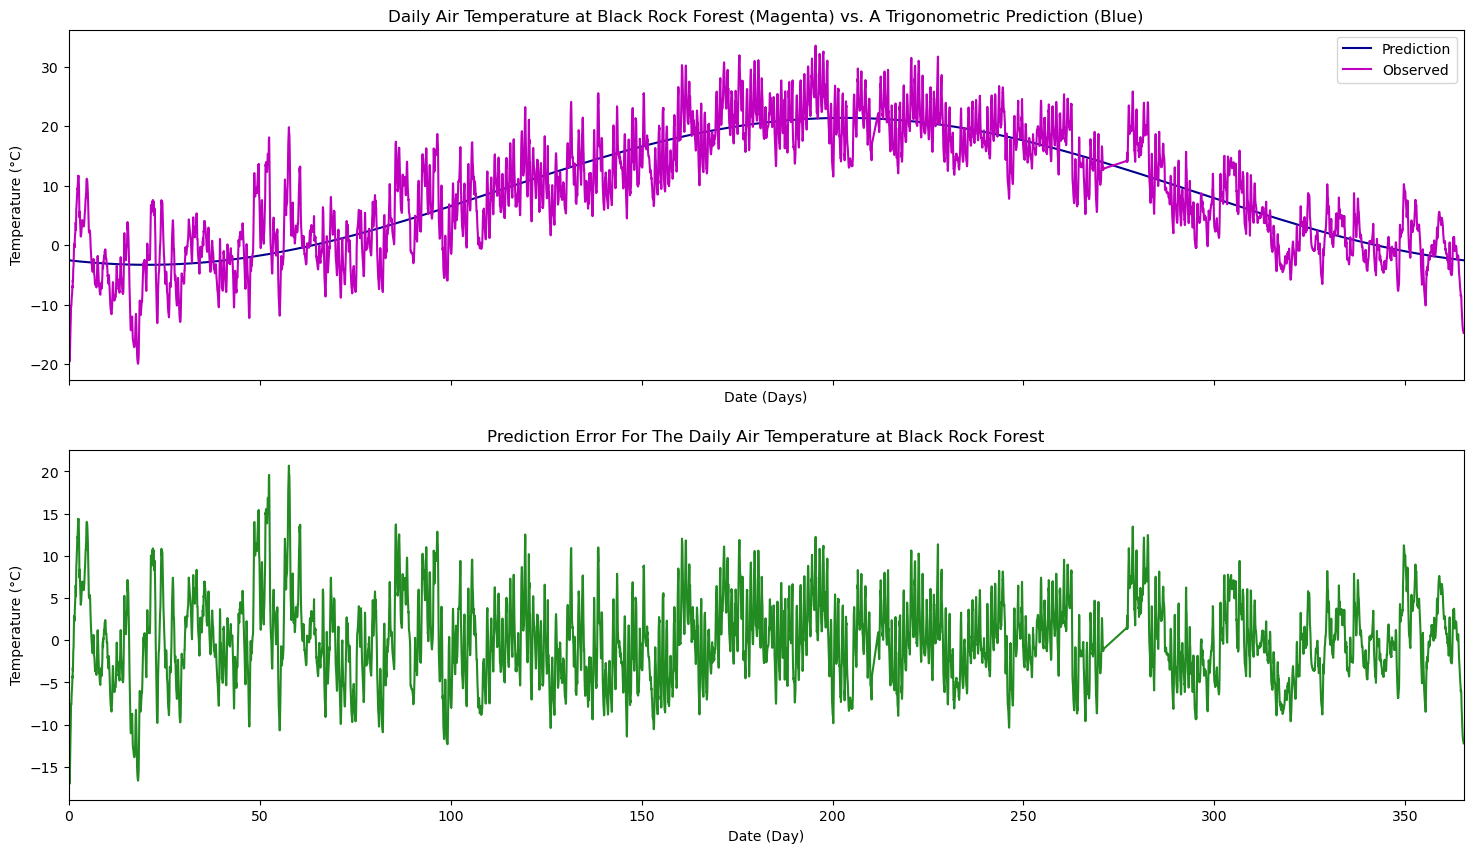

In [43]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (18,10), sharex = True)

ax[0].plot(t, dpre_trig, 'darkblue', label = "Prediction")
ax[0].plot(t, dobs, 'm', label = "Observed")
ax[0].set_xlabel('Date (Days)')
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_title("Daily Air Temperature at Black Rock Forest (Magenta) vs. A Trigonometric Prediction (Blue)") 
ax[0].margins (x=0)
ax[0].legend(loc = "upper right")

ax[1].margins(x=0)
ax[1].plot(t,e, 'forestgreen')
ax[1].set_xlabel('Date (Day)')
ax[1].set_ylabel('Temperature (°C)')
ax[1].set_title("Prediction Error For The Daily Air Temperature at Black Rock Forest")
